In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.graph_objects as go
import pgeocode
from sklearn.preprocessing import OneHotEncoder
print("Successful Import")

Successful Import


In [3]:
os.chdir('C:/Users/willi/Documents/Data Science Practice Projects/Business Loan Creditworthiness Prediction/')
df = pd.read_csv(r'SBAnational.csv')
df.head()

C:\Users\willi\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

#### The following attributes require a change in data type: EDIT REQUIRED

[LoanNr_ChkDgt, Zip, NAICS, ApprovalDate, ApprovalFY, NewExist, FranchiseCode, UrbanRural, ChgOffDate, DisbursementDate, DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, SBA_Appv]


In [5]:
# Check number of unique values for 'LoanNr_ChkDgt'. If the same as total number of entries, then this is a unique ID and can be remove
print(len(df['LoanNr_ChkDgt'].unique()))

899164


In [6]:
df['LoanNr_ChkDgt'] = df['LoanNr_ChkDgt'].astype(str)
#df['Zip'] = df['Zip'].astype(str)
df['NAICS'] = df['NAICS'].astype(str)
df['FranchiseCode'] = df['FranchiseCode'].astype(str)
#df['UrbanRural'] = df['UrbanRural'].astype(str)

In [7]:
df['DisbursementGross'] = df['DisbursementGross'].str.replace('$','')
df['DisbursementGross'] = df['DisbursementGross'].str.replace(',','')
df['DisbursementGross'] = df['DisbursementGross'].astype(float)

df['BalanceGross'] = df['BalanceGross'].str.replace('$','')
df['BalanceGross'] = df['BalanceGross'].str.replace(',','')
df['BalanceGross'] = df['BalanceGross'].astype(float)

df['ChgOffPrinGr'] = df['ChgOffPrinGr'].str.replace('$','')
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].str.replace(',','')
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].astype(float)

df['GrAppv'] = df['GrAppv'].str.replace('$','')
df['GrAppv'] = df['GrAppv'].str.replace(',','')
df['GrAppv'] = df['GrAppv'].astype(float)

df['SBA_Appv'] = df['SBA_Appv'].str.replace('$','')
df['SBA_Appv'] = df['SBA_Appv'].str.replace(',','')
df['SBA_Appv'] = df['SBA_Appv'].astype(float)

<ipython-input-7-aa58ec5daa33>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['DisbursementGross'] = df['DisbursementGross'].str.replace('$','')
<ipython-input-7-aa58ec5daa33>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['BalanceGross'] = df['BalanceGross'].str.replace('$','')
<ipython-input-7-aa58ec5daa33>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['ChgOffPrinGr'] = df['ChgOffPrinGr'].str.replace('$','')
<ipython-input-7-aa58ec5daa33>:13: FutureWarning: The default value of regex will change from True 

In [8]:
print(df['NewExist'].unique())

[ 2.  1.  0. nan]


In [9]:
# Change data type of 'NewExist' attribute to discrete class
df['NewExist'] = df['NewExist'].astype(str)
print(df['NewExist'].dtypes)
print(df['NewExist'].unique())

object
['2.0' '1.0' '0.0' 'nan']


In [10]:
print('-'*25)
# Check for all instances of 'nan'
for col in df:
    print(str(col) + ' : ' + str((df[col]=='nan').sum()))

-------------------------
LoanNr_ChkDgt : 0
Name : 0
City : 0
State : 0
Zip : 0
Bank : 0
BankState : 0
NAICS : 0
ApprovalDate : 0
ApprovalFY : 0
Term : 0
NoEmp : 0
NewExist : 136
CreateJob : 0
RetainedJob : 0
FranchiseCode : 0
UrbanRural : 0
RevLineCr : 0
LowDoc : 0
ChgOffDate : 0
DisbursementDate : 0
DisbursementGross : 0
BalanceGross : 0
MIS_Status : 0
ChgOffPrinGr : 0
GrAppv : 0
SBA_Appv : 0


In [11]:
# Remove the instance of 'nan' values

df = df[df['NewExist'] != 'nan']
print("Attribute  |  Instances of 'nan'")
for col in df:
    print(str(col) + ' : ' + str((df[col]=='nan').sum()))

Attribute  |  Instances of 'nan'
LoanNr_ChkDgt : 0
Name : 0
City : 0
State : 0
Zip : 0
Bank : 0
BankState : 0
NAICS : 0
ApprovalDate : 0
ApprovalFY : 0
Term : 0
NoEmp : 0
NewExist : 0
CreateJob : 0
RetainedJob : 0
FranchiseCode : 0
UrbanRural : 0
RevLineCr : 0
LowDoc : 0
ChgOffDate : 0
DisbursementDate : 0
DisbursementGross : 0
BalanceGross : 0
MIS_Status : 0
ChgOffPrinGr : 0
GrAppv : 0
SBA_Appv : 0


In [12]:
print((df['NewExist']=='0.0').sum())

1034


In [13]:
df = df[df['NewExist'] != '0.0']
print(df['NewExist'].unique())

['2.0' '1.0']


In [14]:
df['NewExist'] = df['NewExist'].astype(str).str[0]
print(df['NewExist'].unique())

['2' '1']


In [15]:
df['NewExist'] = df['NewExist'].astype(int)
print(df['NewExist'].dtypes)

int32


In [16]:
df['ApprovalDate'].head()

0    28-Feb-97
1    28-Feb-97
2    28-Feb-97
3    28-Feb-97
4    28-Feb-97
Name: ApprovalDate, dtype: object

In [17]:
lst = []
for date in df['ApprovalDate']:
    val = dt.datetime.strptime(date, '%d-%b-%y')
    lst.append(val)
df['ApprovalDate'] = lst
df['ApprovalDate'].head()

0   1997-02-28
1   1997-02-28
2   1997-02-28
3   1997-02-28
4   1997-02-28
Name: ApprovalDate, dtype: datetime64[ns]

In [18]:
# Strip MIS_Status of Spaces
print('Before: ', df['MIS_Status'].unique())
df['MIS_Status'] = df['MIS_Status'].str.replace(' ','')
print('After: ', df['MIS_Status'].unique())

Before:  ['P I F' 'CHGOFF' nan]
After:  ['PIF' 'CHGOFF' nan]


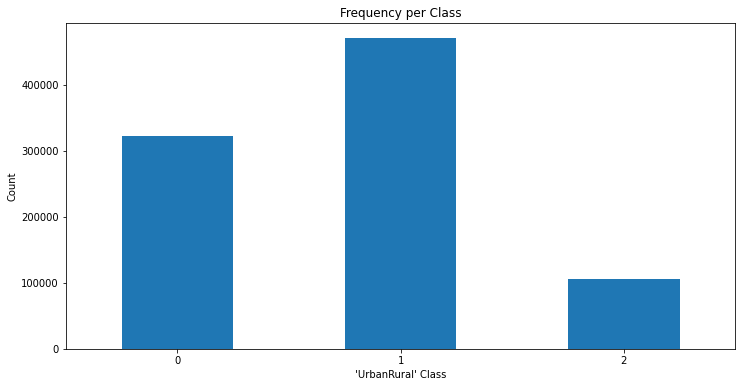

In [19]:
fig = plt.figure(figsize = (12, 6))
df['UrbanRural'].value_counts().sort_index().plot(kind='bar', rot=0, xlabel="'UrbanRural' Class", ylabel='Count', title='Frequency per Class')
plt.show()

In [20]:
#### REMOVE
# Change Urban Rural from Number-form class to Text-form
#print('Before: ', df['UrbanRural'].unique())

#urbanRuralDict = {'0':'undef', '1':'urban', '2':'rural'}

#df['UrbanRural'] = df['UrbanRural'].map(urbanRuralDict) 

#print('After: ', df['UrbanRural'].unique())

In [21]:
# Add new column changing FranchiseCode to binary attribute (Franchise/No Franchise)
print('Before: ', df['FranchiseCode'].unique())
def franchiseBinary(val):
    if val == '1' or val == '0':
        val = '0'
        return val
    elif val != '1' or val != '0' or pd.isnull(val) != True:
        val = '1'
        return val
df['FranchiseFlag'] = df['FranchiseCode'].apply(franchiseBinary)
df['FranchiseFlag'] = df['FranchiseFlag'].astype(str)
print('New Variable: ', df['FranchiseFlag'].unique()) 

Before:  ['1' '0' '15100' ... '2899' '18701' '15930']
New Variable:  ['0' '1']


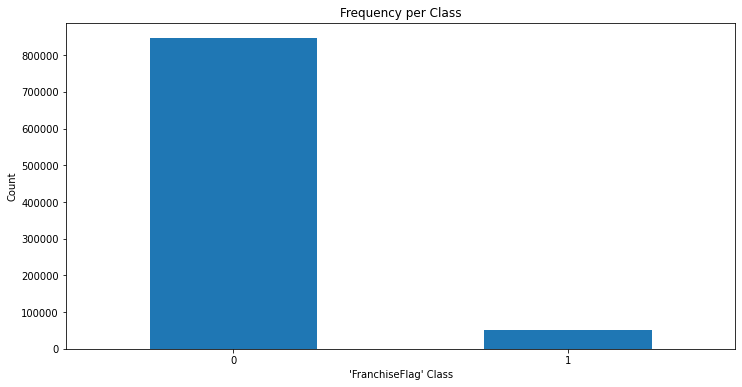

In [22]:
fig = plt.figure(figsize = (12, 6))
df['FranchiseFlag'].value_counts().sort_index().plot(kind='bar', rot=0, xlabel="'FranchiseFlag' Class", ylabel='Count', title='Frequency per Class')
plt.show()
# Nearly all instances are not franchised, thus drop both columns related to Franchise

In [23]:
# Drop unecessary columns
df = df.drop(columns = ['LoanNr_ChkDgt','ChgOffDate', 'ChgOffPrinGr', 'BankState', 'Name', 'FranchiseCode', 'FranchiseFlag'])
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897994 entries, 0 to 899163
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   City               897964 non-null  object        
 1   State              897981 non-null  object        
 2   Zip                897994 non-null  int64         
 3   Bank               896437 non-null  object        
 4   NAICS              897994 non-null  object        
 5   ApprovalDate       897994 non-null  datetime64[ns]
 6   ApprovalFY         897994 non-null  object        
 7   Term               897994 non-null  int64         
 8   NoEmp              897994 non-null  int64         
 9   NewExist           897994 non-null  int32         
 10  CreateJob          897994 non-null  int64         
 11  RetainedJob        897994 non-null  int64         
 12  UrbanRural         897994 non-null  int64         
 13  RevLineCr          893469 non-null  object  

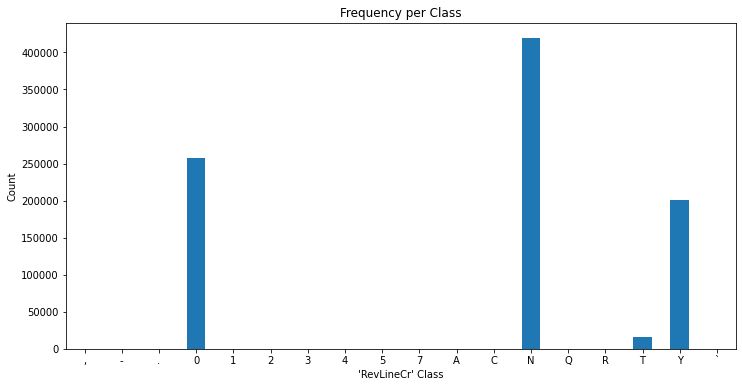

In [24]:
fig = plt.figure(figsize = (12, 6))
df['RevLineCr'].value_counts().sort_index().plot(kind='bar', rot=0, xlabel="'RevLineCr' Class", ylabel='Count', title='Frequency per Class')
plt.show()

In [25]:
# Delete any rows where 'RevLineCred' isn't Y, N, or 0
df = df[df['RevLineCr'].isin(['Y','N'])].reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620582 entries, 0 to 620581
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   City               620552 non-null  object        
 1   State              620569 non-null  object        
 2   Zip                620582 non-null  int64         
 3   Bank               619052 non-null  object        
 4   NAICS              620582 non-null  object        
 5   ApprovalDate       620582 non-null  datetime64[ns]
 6   ApprovalFY         620582 non-null  object        
 7   Term               620582 non-null  int64         
 8   NoEmp              620582 non-null  int64         
 9   NewExist           620582 non-null  int32         
 10  CreateJob          620582 non-null  int64         
 11  RetainedJob        620582 non-null  int64         
 12  UrbanRural         620582 non-null  int64         
 13  RevLineCr          620582 non-null  object  

In [26]:
def yesnoBinary(val):
    if val == 'N':
        val = 0
        return val
    elif val == 'Y':
        val = 1
        return val

df['RevLineCr'] = df['RevLineCr'].apply(yesnoBinary)
df.info()
print("\nUnique values for 'RevLineCr: ", str(df['RevLineCr'].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620582 entries, 0 to 620581
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   City               620552 non-null  object        
 1   State              620569 non-null  object        
 2   Zip                620582 non-null  int64         
 3   Bank               619052 non-null  object        
 4   NAICS              620582 non-null  object        
 5   ApprovalDate       620582 non-null  datetime64[ns]
 6   ApprovalFY         620582 non-null  object        
 7   Term               620582 non-null  int64         
 8   NoEmp              620582 non-null  int64         
 9   NewExist           620582 non-null  int32         
 10  CreateJob          620582 non-null  int64         
 11  RetainedJob        620582 non-null  int64         
 12  UrbanRural         620582 non-null  int64         
 13  RevLineCr          620582 non-null  int64   

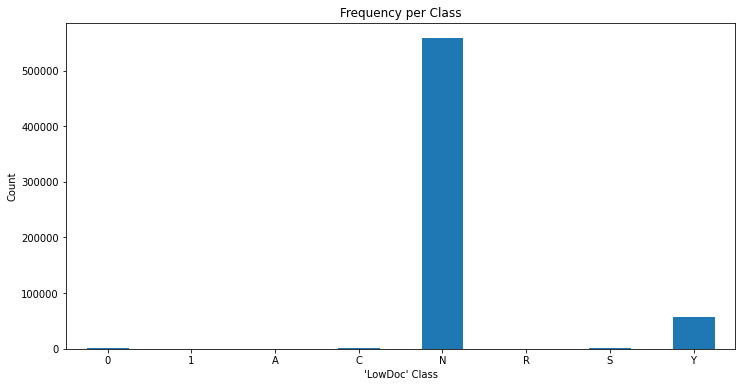

In [27]:
fig = plt.figure(figsize = (12, 6))
df['LowDoc'].value_counts().sort_index().plot(kind='bar', rot=0, xlabel="'LowDoc' Class", ylabel='Count', title='Frequency per Class')
plt.show()

In [28]:
# Delete any rows where 'LowDoc' isn't Y, N
df = df[df['LowDoc'].isin(['Y','N'])]
df['LowDoc'] = df['LowDoc'].apply(yesnoBinary)
df.info()
print("\nUnique values for 'LowDoc: ", str(df['LowDoc'].unique()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615482 entries, 0 to 620581
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   City               615452 non-null  object        
 1   State              615469 non-null  object        
 2   Zip                615482 non-null  int64         
 3   Bank               613954 non-null  object        
 4   NAICS              615482 non-null  object        
 5   ApprovalDate       615482 non-null  datetime64[ns]
 6   ApprovalFY         615482 non-null  object        
 7   Term               615482 non-null  int64         
 8   NoEmp              615482 non-null  int64         
 9   NewExist           615482 non-null  int32         
 10  CreateJob          615482 non-null  int64         
 11  RetainedJob        615482 non-null  int64         
 12  UrbanRural         615482 non-null  int64         
 13  RevLineCr          615482 non-null  int64   

In [29]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610202 entries, 0 to 620581
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   City               610202 non-null  object        
 1   State              610202 non-null  object        
 2   Zip                610202 non-null  int64         
 3   Bank               610202 non-null  object        
 4   NAICS              610202 non-null  object        
 5   ApprovalDate       610202 non-null  datetime64[ns]
 6   ApprovalFY         610202 non-null  object        
 7   Term               610202 non-null  int64         
 8   NoEmp              610202 non-null  int64         
 9   NewExist           610202 non-null  int32         
 10  CreateJob          610202 non-null  int64         
 11  RetainedJob        610202 non-null  int64         
 12  UrbanRural         610202 non-null  int64         
 13  RevLineCr          610202 non-null  int64   

In [30]:
# Convert 'DisbursementDate' to datetime
lst = []
for date in df['DisbursementDate']:
    val = dt.datetime.strptime(date, '%d-%b-%y')
    lst.append(val)
df['DisbursementDate'] = lst
df['DisbursementDate'].head()

0   1999-02-28
1   1997-05-31
2   1997-12-31
3   1997-06-30
4   1997-05-14
Name: DisbursementDate, dtype: datetime64[ns]

In [31]:
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)
print('\n')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns)

Index(['City', 'State', 'Bank', 'NAICS', 'ApprovalFY', 'MIS_Status'], dtype='object')


Index(['Zip', 'Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv',
       'SBA_Appv'],
      dtype='object')


In [32]:
# Visualization of distribution of states 

tempdf = pd.DataFrame(data=df, columns=['State','Count'])
tempdf = tempdf.groupby(['State'])['State'].count()
tempdf = pd.DataFrame(data=tempdf)
tempdf = tempdf.rename(columns = {'State':'Count'})

fig = go.Figure(data=go.Choropleth(
    locations = tempdf.index,
    z = tempdf.Count,
    locationmode = 'USA-states',
    colorscale = 'reds',
    colorbar_title = '# of SBA Loan Applications')
)
fig.update_layout(
    title_text = '<b>Frequency of SBA Loan Applications per State</b>',
    geo_scope = 'usa' #limit scope to the USA
)
fig.show()

In [33]:
# NAICS Conversion based on first two charachters of the NAICS code

dictNAICS = {'11': 'Agriculture, forestry, fishing and hunting',
'21': 'Mining, quarrying, and oil and gas extraction',
'22': 'Utilities',
'23': 'Construction',
'31': 'Manufacturing',
'32': 'Manufacturing',
'33': 'Manufacturing',
'42': 'Wholesale trade',
'44': 'Retail trade',
'45': 'Retail trade',
'48': 'Transportation and warehousing',
'49': 'Transportation and warehousing',
'51': 'Information',
'52': 'Finance and insurance',
'53': 'Real estate and rental and leasing',
'54': 'Professional, scientific, and technical services',
'55': 'Management of companies and enterprises',
'56': 'Administrative and support and waste management and remediation services',
'61': 'Educational services',
'62': 'Health care and social assistance',
'71': 'Arts, entertainment, and recreation',
'72': 'Accommodation and food services',
'81': 'Other services (except public administration)',
'92': 'Public administration',
'0':'N/A'
}

first2charsNAICS = []
for val in df['NAICS']:
    c = val[:2]
    first2charsNAICS.append(c)
#first2charsNAICS
industrySectors = list(map(dictNAICS.get, first2charsNAICS))
industrySectors

['Retail trade',
 'Accommodation and food services',
 'Health care and social assistance',
 'N/A',
 'N/A',
 'Manufacturing',
 'N/A',
 'Other services (except public administration)',
 'Accommodation and food services',
 'N/A',
 'Other services (except public administration)',
 'Construction',
 'Retail trade',
 'N/A',
 'N/A',
 'Wholesale trade',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'Health care and social assistance',
 'N/A',
 'N/A',
 'Accommodation and food services',
 'Retail trade',
 'N/A',
 'Educational services',
 'Retail trade',
 'Construction',
 'Health care and social assistance',
 'Real estate and rental and leasing',
 'Retail trade',
 'Professional, scientific, and technical services',
 'N/A',
 'N/A',
 'N/A',
 'Manufacturing',
 'N/A',
 'Construction',
 'N/A',
 'Health care and social assistance',
 'Accommodation and food services',
 'Retail trade',
 'N/A',
 'Information',
 'Manufacturing',
 'Retail trade',
 'N/A',
 'N/A',
 'Wholesale trade',
 'Finance and insurance',
 'N/A

In [34]:
df['Industry'] = industrySectors
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610202 entries, 0 to 620581
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   City               610202 non-null  object        
 1   State              610202 non-null  object        
 2   Zip                610202 non-null  int64         
 3   Bank               610202 non-null  object        
 4   NAICS              610202 non-null  object        
 5   ApprovalDate       610202 non-null  datetime64[ns]
 6   ApprovalFY         610202 non-null  object        
 7   Term               610202 non-null  int64         
 8   NoEmp              610202 non-null  int64         
 9   NewExist           610202 non-null  int32         
 10  CreateJob          610202 non-null  int64         
 11  RetainedJob        610202 non-null  int64         
 12  UrbanRural         610202 non-null  int64         
 13  RevLineCr          610202 non-null  int64   

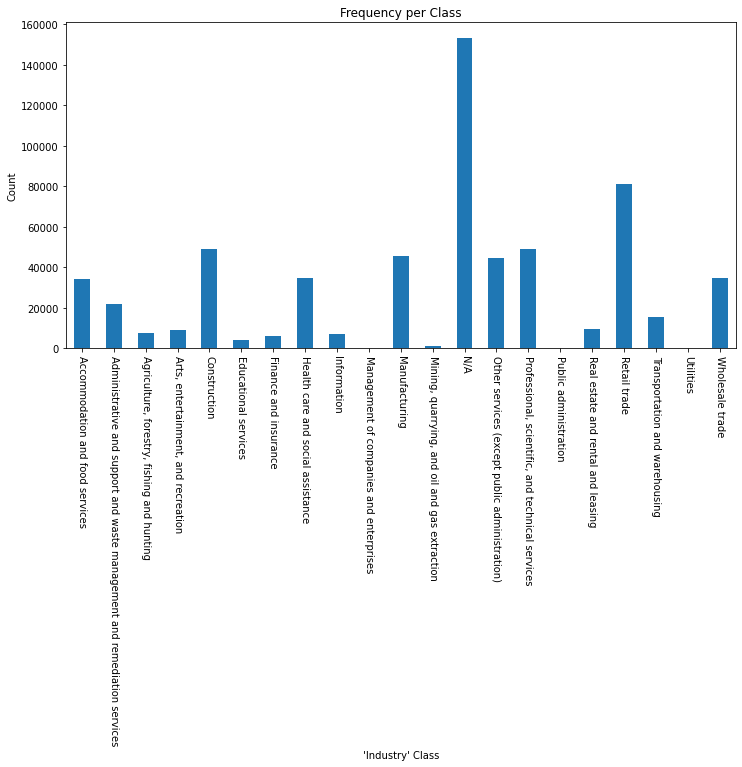

In [35]:
fig = plt.figure(figsize = (12, 6))
df['Industry'].value_counts().sort_index().plot(kind='bar', rot=270, xlabel="'Industry' Class", ylabel='Count', title='Frequency per Class')
plt.show()

In [36]:
# Apply this to the main df
df = df[df['Industry'] != 'N/A'].reset_index(drop = True)
df = df.drop(columns = ['NAICS'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456950 entries, 0 to 456949
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   City               456950 non-null  object        
 1   State              456950 non-null  object        
 2   Zip                456950 non-null  int64         
 3   Bank               456950 non-null  object        
 4   ApprovalDate       456950 non-null  datetime64[ns]
 5   ApprovalFY         456950 non-null  object        
 6   Term               456950 non-null  int64         
 7   NoEmp              456950 non-null  int64         
 8   NewExist           456950 non-null  int32         
 9   CreateJob          456950 non-null  int64         
 10  RetainedJob        456950 non-null  int64         
 11  UrbanRural         456950 non-null  int64         
 12  RevLineCr          456950 non-null  int64         
 13  LowDoc             456950 non-null  int64   

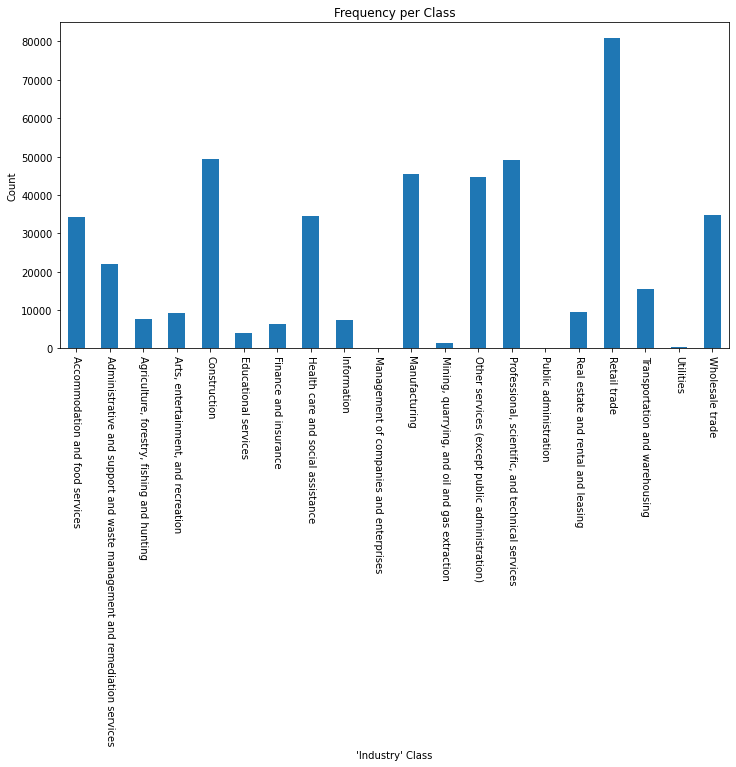

In [37]:
fig = plt.figure(figsize = (12, 6))
df['Industry'].value_counts().sort_index().plot(kind='bar', rot=270, xlabel="'Industry' Class", ylabel='Count', title='Frequency per Class')
plt.show()

In [38]:
# One-hot encoding Industry adttribute

def one_hot_encoder_one(data,feature,keep_first=True):

    oh = OneHotEncoder()
    
    oh_df = pd.DataFrame(oh.fit_transform(data[[feature]]).toarray())
    oh_df.columns = oh.get_feature_names_out()
    
    for col in oh_df.columns:
        oh_df.rename({col:f'{feature}_'+col.split('_')[1]},axis=1,inplace=True)
    
    new_data = pd.concat([data,oh_df],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [39]:
df = one_hot_encoder_one(df,'Industry')
df.head()

,City,State,Zip,Bank,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,...,Industry_Manufacturing,"Industry_Mining, quarrying, and oil and gas extraction",Industry_Other services (except public administration),"Industry_Professional, scientific, and technical services",Industry_Public administration,Industry_Real estate and rental and leasing,Industry_Retail trade,Industry_Transportation and warehousing,Industry_Utilities,Industry_Wholesale trade
0,EVANSVILLE,IN,47711,FIFTH THIRD BANK,1997-02-28,1997,84,4,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,NEW PARIS,IN,46526,1ST SOURCE BANK,1997-02-28,1997,60,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,1997-02-28,1997,180,7,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",1997-02-28,1997,120,19,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SUMMERFIELD,FL,34491,REGIONS BANK,1997-02-28,1997,84,1,2,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456950 entries, 0 to 456949
Data columns (total 40 columns):
 #   Column                                                                             Non-Null Count   Dtype         
---  ------                                                                             --------------   -----         
 0   City                                                                               456950 non-null  object        
 1   State                                                                              456950 non-null  object        
 2   Zip                                                                                456950 non-null  int64         
 3   Bank                                                                               456950 non-null  object        
 4   ApprovalDate                                                                       456950 non-null  datetime64[ns]
 5   ApprovalFY                                  

In [41]:
# Bank
tempBankdf = df['Bank'].copy()
print(tempBankdf.value_counts())

BANK OF AMERICA NATL ASSOC        60118
JPMORGAN CHASE BANK NATL ASSOC    34416
WELLS FARGO BANK NATL ASSOC       27866
CITIZENS BANK NATL ASSOC          27734
U.S. BANK NATIONAL ASSOCIATION    21763
                                  ...  
FIRST TENNESSEE ECONOMIC              1
FDIC/ 1ST NATL BK - VERMONT           1
DIVERSIFIED FINAN SYSTEM INC          1
THE PORTAGE COUNTY BANK               1
BLACK RIVER COUNTRY BANK              1
Name: Bank, Length: 4834, dtype: int64


In [42]:
top250Banks = tempBankdf.value_counts().head(250).index
top250Banks

Index(['BANK OF AMERICA NATL ASSOC', 'JPMORGAN CHASE BANK NATL ASSOC',
       'WELLS FARGO BANK NATL ASSOC', 'CITIZENS BANK NATL ASSOC',
       'U.S. BANK NATIONAL ASSOCIATION', 'CAPITAL ONE NATL ASSOC',
       'PNC BANK, NATIONAL ASSOCIATION', 'BBCN BANK',
       'MANUFACTURERS & TRADERS TR CO', 'THE HUNTINGTON NATIONAL BANK',
       ...
       'CENTURY BANK AND TRUST COMPANY', 'OPUS BANK', 'VENTURE BANK',
       'SHINHAN BANK AMERICA', 'PEOPLE'S BANK OF COMMERCE',
       'CAMDEN NATIONAL BANK', 'PASSUMPSIC SAVINGS BANK',
       'AMER BANK NATL ASSOC', 'SUNWEST BANK',
       'MERCANTIL COMMERCEBANK NATL AS'],
      dtype='object', length=250)

In [43]:
# 'Bank' attribute cardinality too high, thus remove
df = df.drop(columns=['Bank'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456950 entries, 0 to 456949
Data columns (total 39 columns):
 #   Column                                                                             Non-Null Count   Dtype         
---  ------                                                                             --------------   -----         
 0   City                                                                               456950 non-null  object        
 1   State                                                                              456950 non-null  object        
 2   Zip                                                                                456950 non-null  int64         
 3   ApprovalDate                                                                       456950 non-null  datetime64[ns]
 4   ApprovalFY                                                                         456950 non-null  object        
 5   Term                                        

### Discretization of Numeric Features using Unsupervized Binning Techniques (using Quantiles)

In [44]:
numdf = df[numeric_columns]
numdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456950 entries, 0 to 456949
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Zip                456950 non-null  int64  
 1   Term               456950 non-null  int64  
 2   NoEmp              456950 non-null  int64  
 3   CreateJob          456950 non-null  int64  
 4   RetainedJob        456950 non-null  int64  
 5   UrbanRural         456950 non-null  int64  
 6   RevLineCr          456950 non-null  int64  
 7   LowDoc             456950 non-null  int64  
 8   DisbursementGross  456950 non-null  float64
 9   BalanceGross       456950 non-null  float64
 10  GrAppv             456950 non-null  float64
 11  SBA_Appv           456950 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 41.8 MB


In [45]:
pd.options.display.float_format = "{:.2f}".format

In [46]:
def numVisualsKDE(col):
    plt.figure(figsize=(16,9))
    plt.xlabel(col)
    plt.ylabel('Density')
    sns.kdeplot(data=numdf, x=col, fill = True)
    plt.show()
    print(numdf[col].describe())

In [47]:
def numVisualsHist(col):
    plt.figure(figsize=(16,9))
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.hist(numdf[col])
    plt.show()
    print(numdf[col].describe())

In [48]:
def numBinFunc(col):
    percentile25 = col.quantile(0.25)
    percentile50 = col.quantile(0.50)
    percentile75 = col.quantile(0.75)

    result = pd.qcut(col, q = 4, labels = ['<= ' + str(percentile25), str(percentile25) + ' - ' + str(percentile50), 
    str(percentile50) + ' - ' + str(percentile75), '> ' + str(percentile75)])

    return result
   

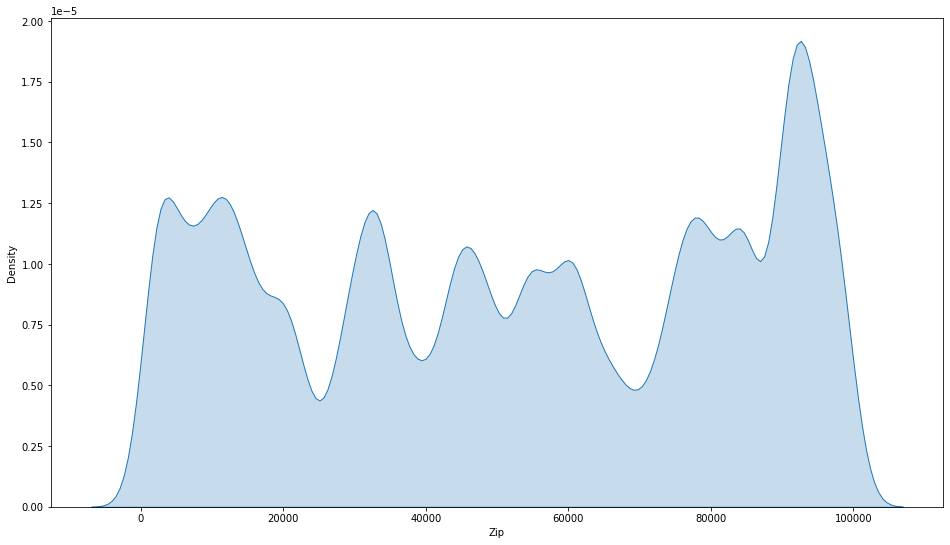

count   456950.00
mean     52100.87
std      31343.14
min          0.00
25%      22150.00
50%      53226.00
75%      82414.00
max      99999.00
Name: Zip, dtype: float64


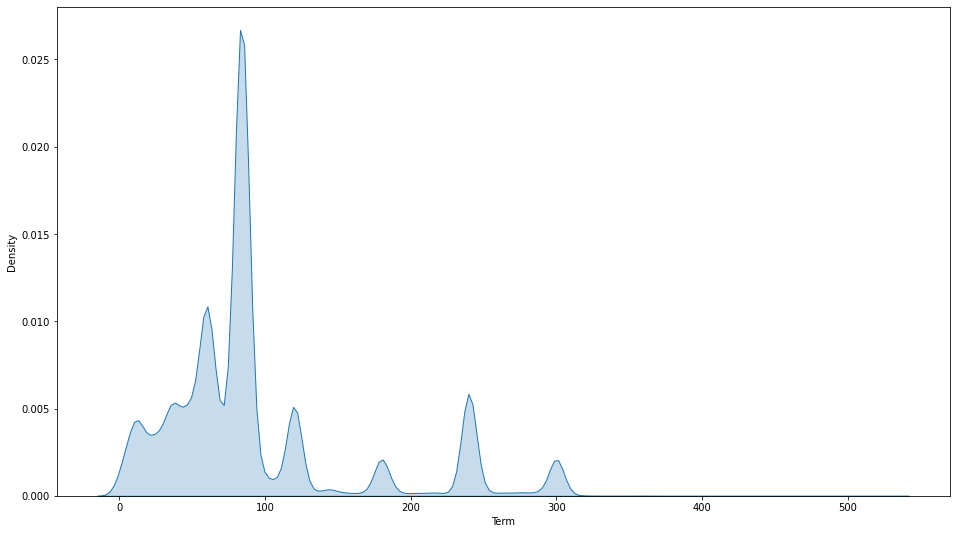

count   456950.00
mean        93.81
std         68.36
min          0.00
25%         59.00
50%         84.00
75%         90.00
max        527.00
Name: Term, dtype: float64


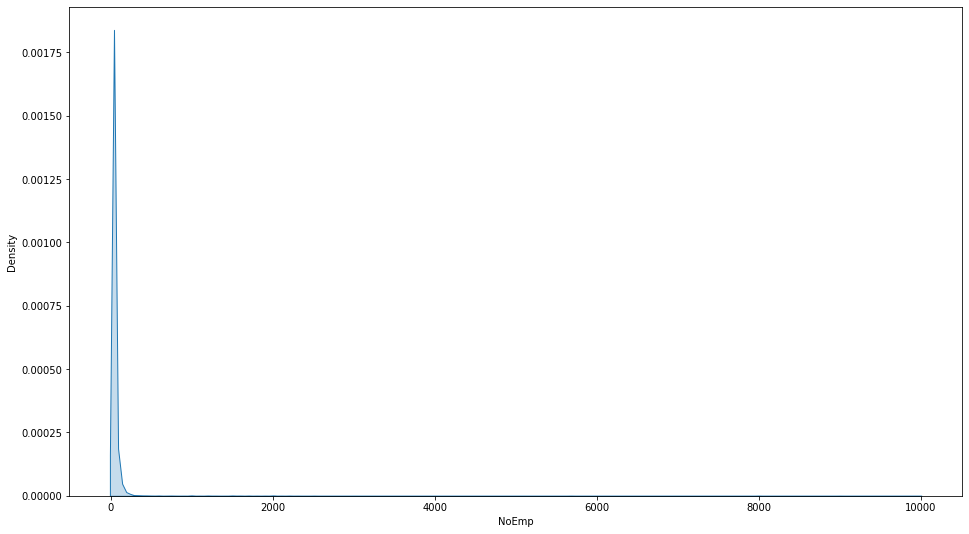

count   456950.00
mean         9.90
std         56.81
min          0.00
25%          2.00
50%          4.00
75%          9.00
max       9999.00
Name: NoEmp, dtype: float64


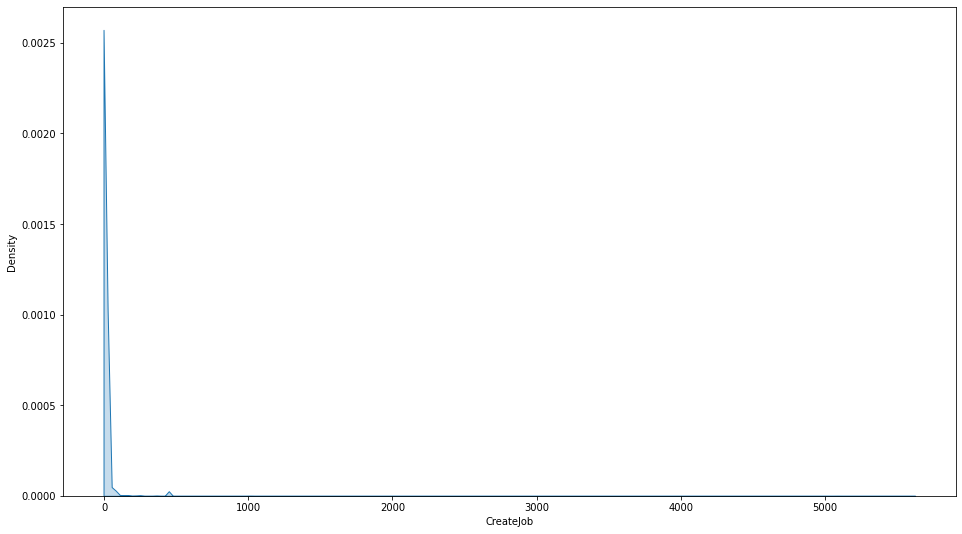

count   456950.00
mean         1.90
std         16.28
min          0.00
25%          0.00
50%          0.00
75%          1.00
max       5621.00
Name: CreateJob, dtype: float64


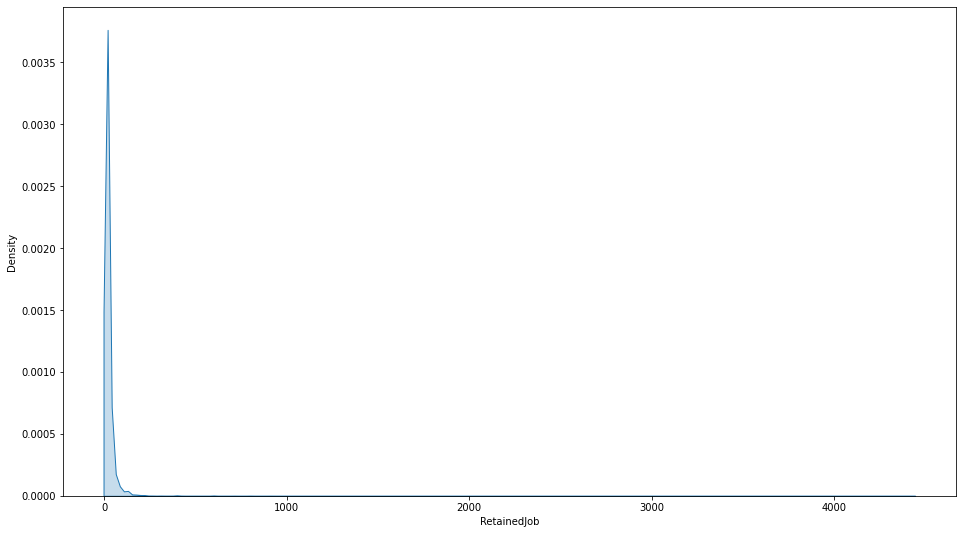

count   456950.00
mean         4.78
std         15.70
min          0.00
25%          0.00
50%          1.00
75%          5.00
max       4441.00
Name: RetainedJob, dtype: float64


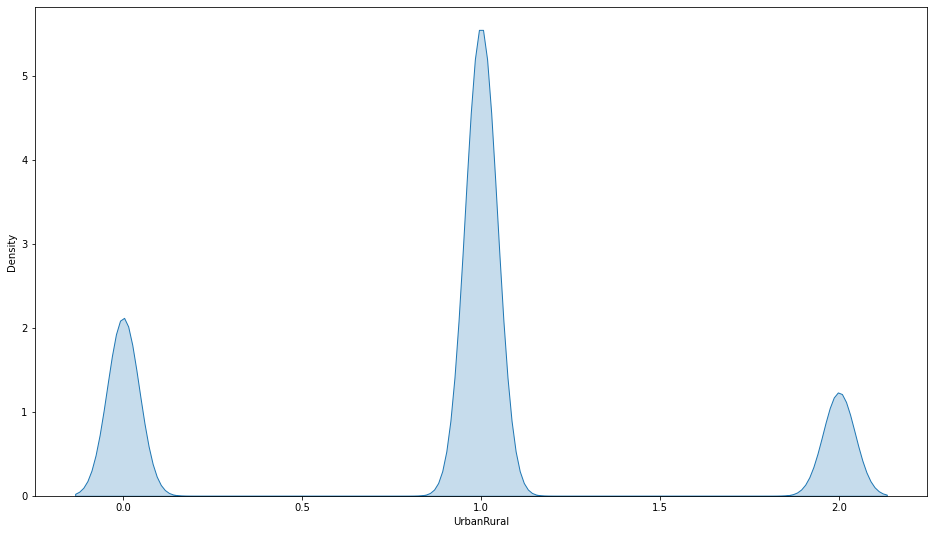

count   456950.00
mean         0.90
std          0.60
min          0.00
25%          1.00
50%          1.00
75%          1.00
max          2.00
Name: UrbanRural, dtype: float64


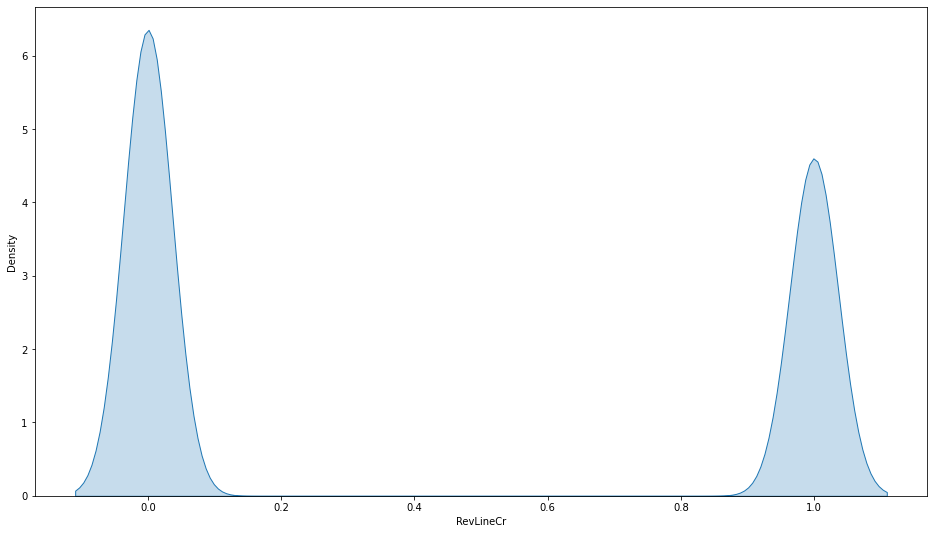

count   456950.00
mean         0.42
std          0.49
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          1.00
Name: RevLineCr, dtype: float64


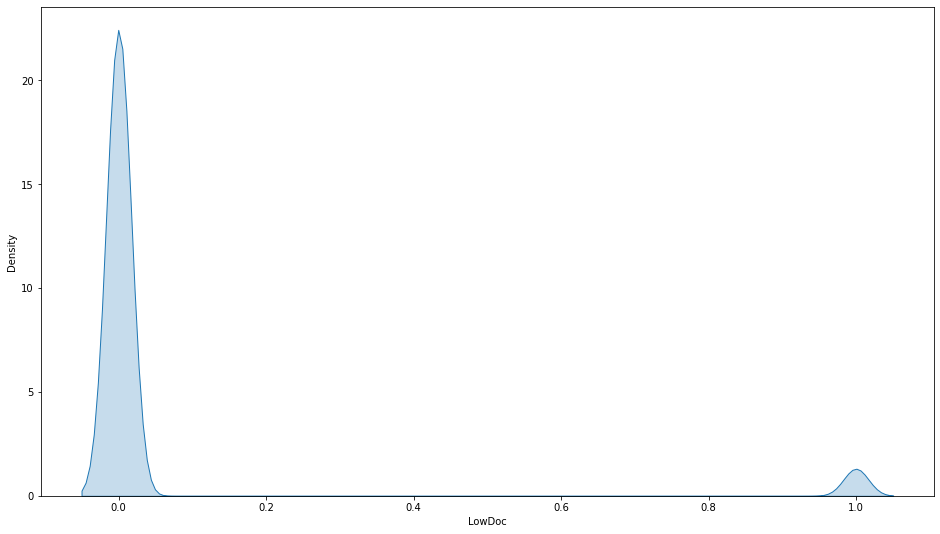

count   456950.00
mean         0.05
std          0.23
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: LowDoc, dtype: float64


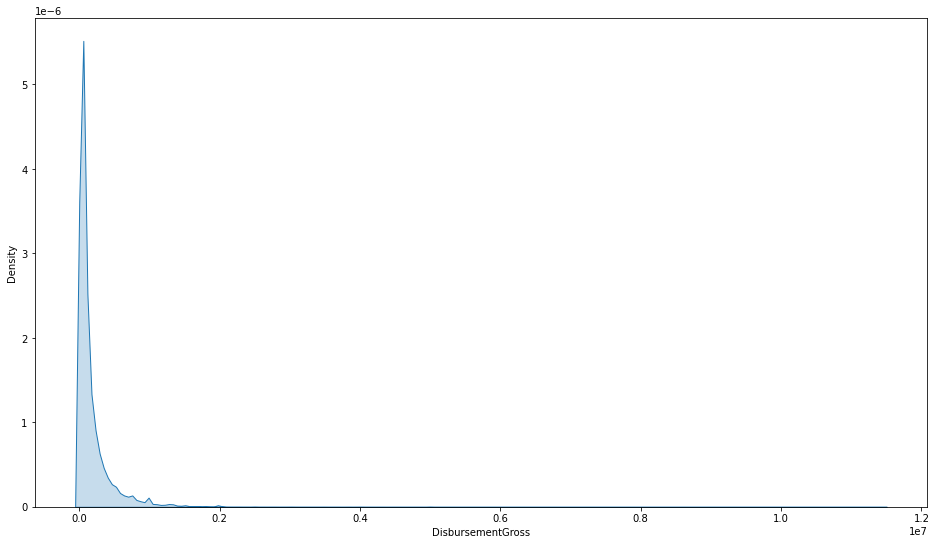

count     456950.00
mean      172163.26
std       275114.19
min         4000.00
25%        35000.00
50%        75766.00
75%       192000.00
max     11446325.00
Name: DisbursementGross, dtype: float64


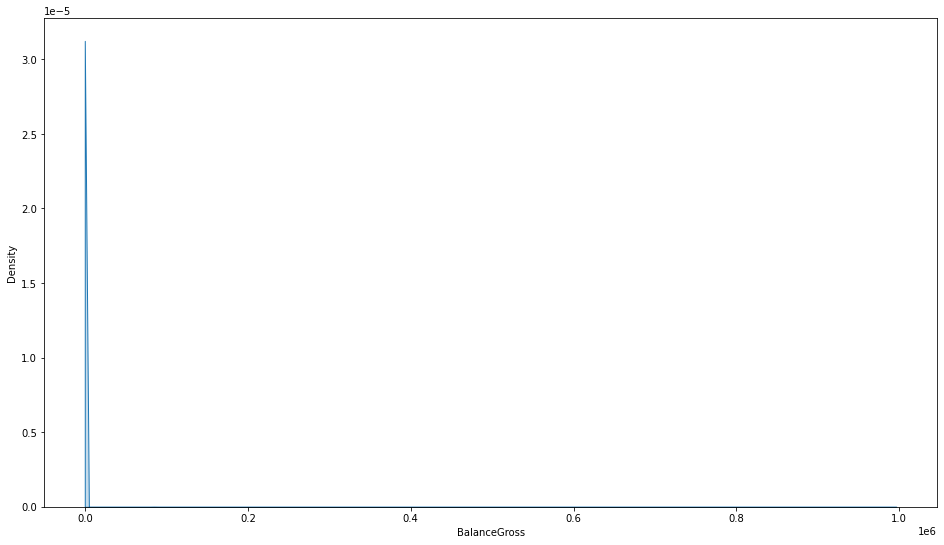

count   456950.00
mean         4.41
std       1922.53
min          0.00
25%          0.00
50%          0.00
75%          0.00
max     996262.00
Name: BalanceGross, dtype: float64


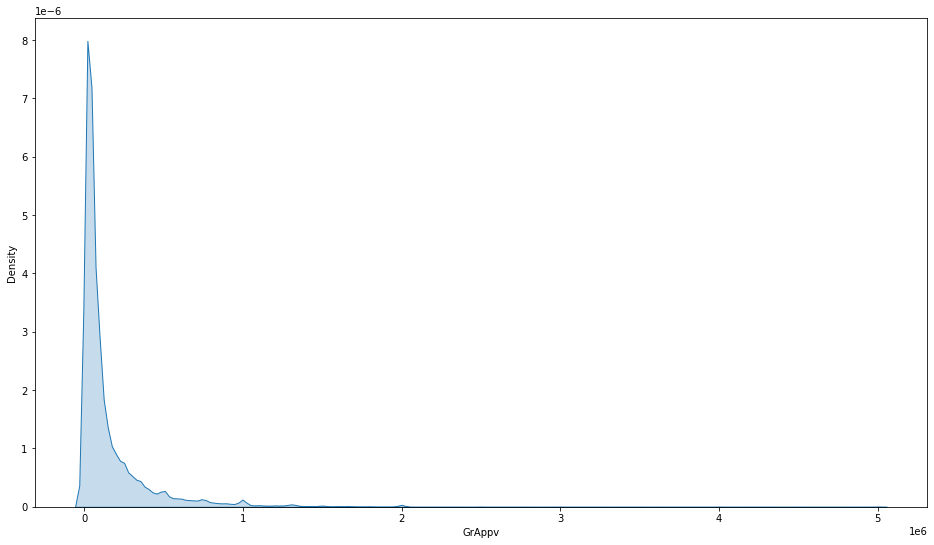

count    456950.00
mean     154212.03
std      261325.30
min        1000.00
25%       25000.00
50%       50000.00
75%      157000.00
max     5000000.00
Name: GrAppv, dtype: float64


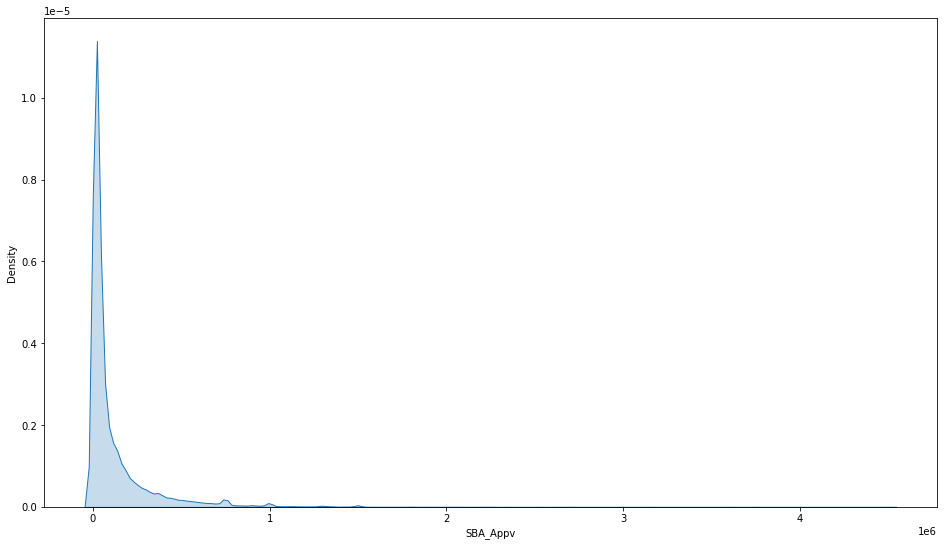

count    456950.00
mean     117206.37
std      214195.26
min         500.00
25%       12750.00
50%       35000.00
75%      125000.00
max     4500000.00
Name: SBA_Appv, dtype: float64


In [49]:
for col in numdf:
    numVisualsKDE(col)

In [50]:
# 'CreateJob' Too many 0 values, thus remove attribute
# 'RetainedJob' Too many 0 values, thus remove attribute
# 'BalanceGrossNearly all values are $0.00, thus remove attribute

numdf = numdf.drop(columns = ['CreateJob', 'RetainedJob', 'BalanceGross'])
numdf

,Zip,Term,NoEmp,UrbanRural,RevLineCr,LowDoc,DisbursementGross,GrAppv,SBA_Appv
0,47711,84,4,0,0,1,60000.00,60000.00,48000.00
1,46526,60,2,0,0,1,40000.00,40000.00,32000.00
2,47401,180,7,0,0,0,287000.00,287000.00,215250.00
3,6062,120,19,0,0,0,517000.00,517000.00,387750.00
4,34491,84,1,0,0,1,45000.00,45000.00,36000.00
...,...,...,...,...,...,...,...,...,...
456945,21043,60,5,0,1,0,25000.00,25000.00,12500.00
456946,94603,240,8,0,0,0,189000.00,189000.00,189000.00
456947,92020,36,40,0,0,0,200000.00,200000.00,150000.00
456948,43221,60,6,0,1,0,85000.00,85000.00,42500.00


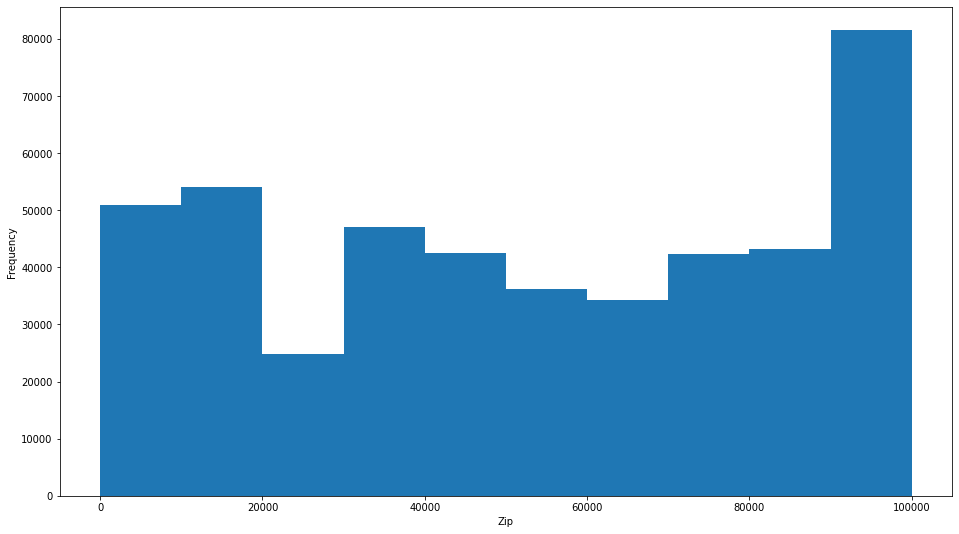

count   456950.00
mean     52100.87
std      31343.14
min          0.00
25%      22150.00
50%      53226.00
75%      82414.00
max      99999.00
Name: Zip, dtype: float64


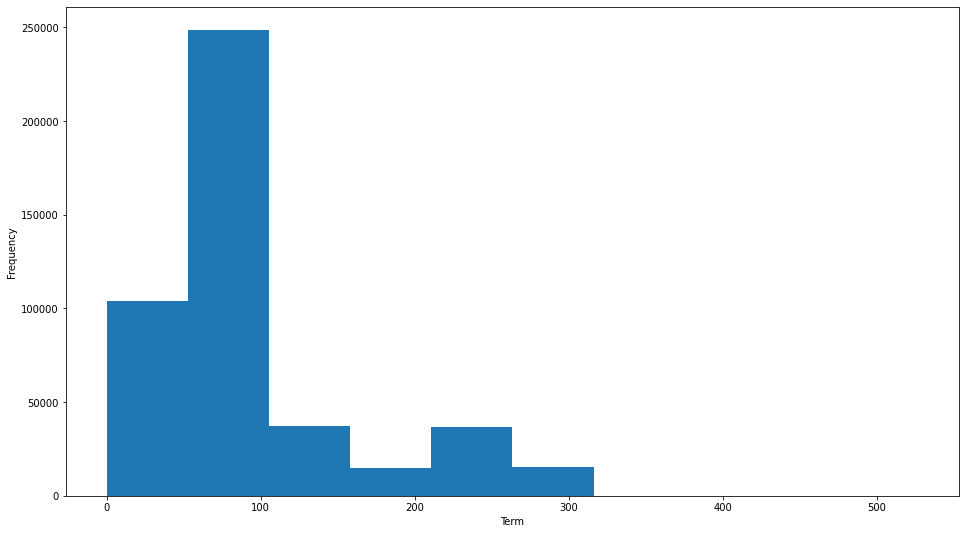

count   456950.00
mean        93.81
std         68.36
min          0.00
25%         59.00
50%         84.00
75%         90.00
max        527.00
Name: Term, dtype: float64


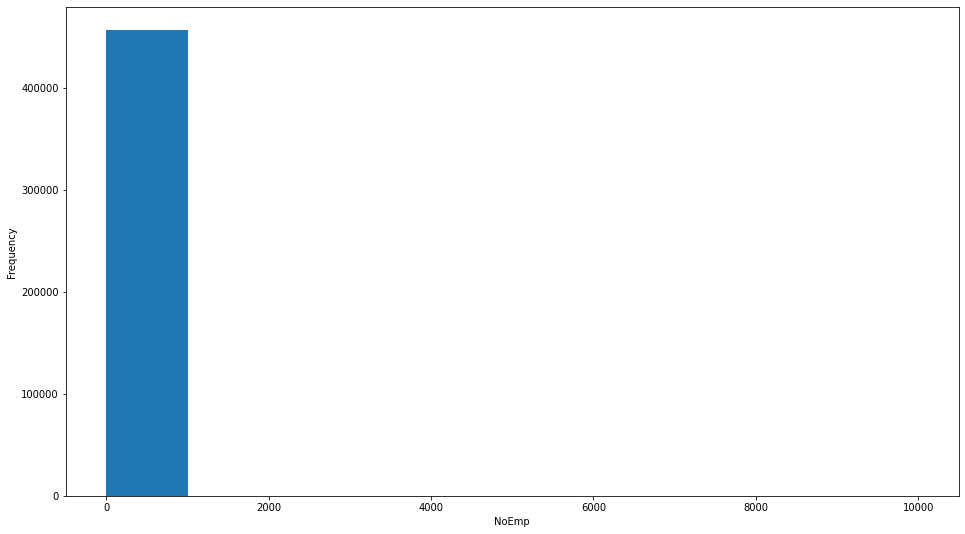

count   456950.00
mean         9.90
std         56.81
min          0.00
25%          2.00
50%          4.00
75%          9.00
max       9999.00
Name: NoEmp, dtype: float64


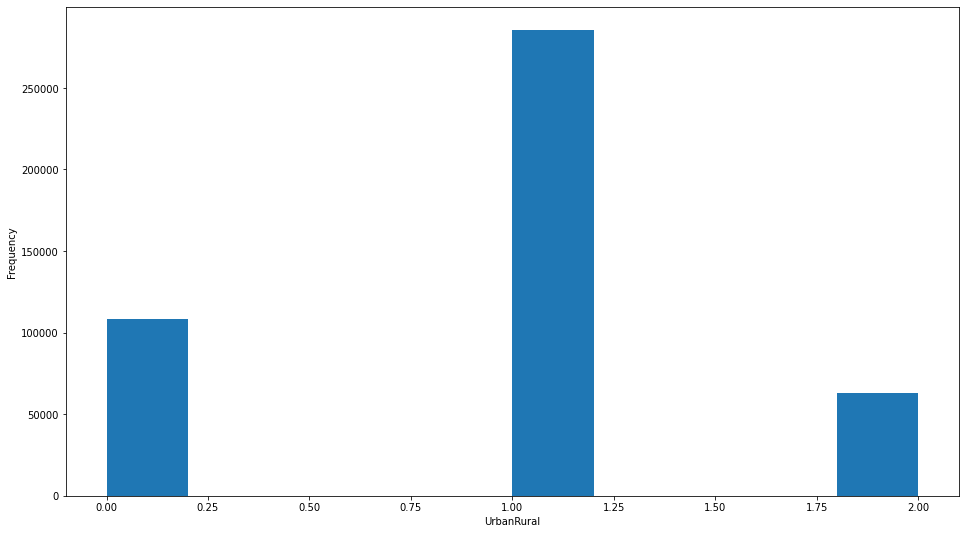

count   456950.00
mean         0.90
std          0.60
min          0.00
25%          1.00
50%          1.00
75%          1.00
max          2.00
Name: UrbanRural, dtype: float64


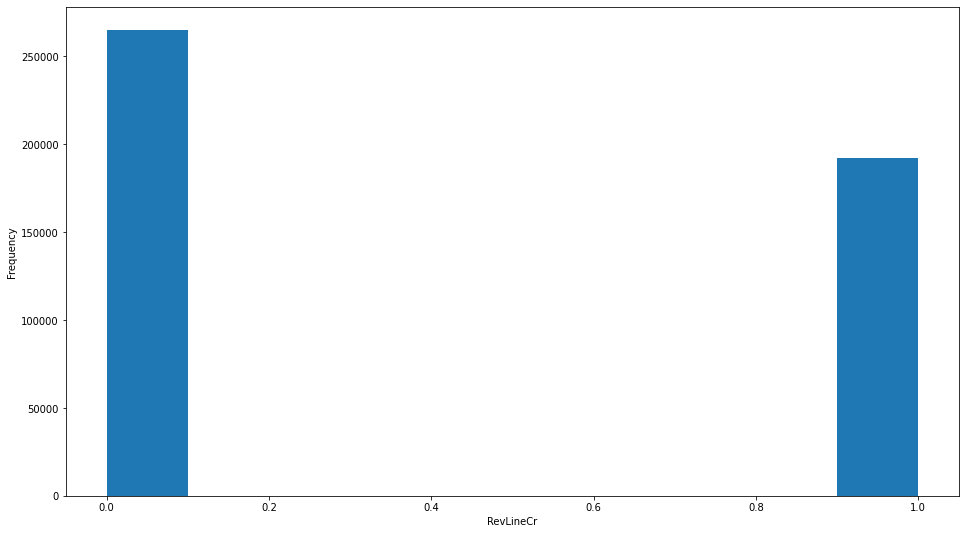

count   456950.00
mean         0.42
std          0.49
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          1.00
Name: RevLineCr, dtype: float64


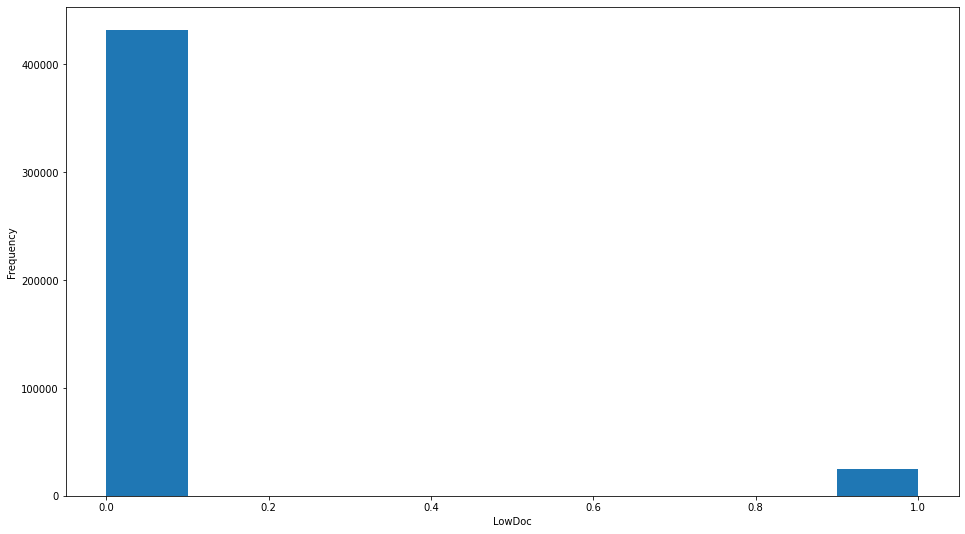

count   456950.00
mean         0.05
std          0.23
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: LowDoc, dtype: float64


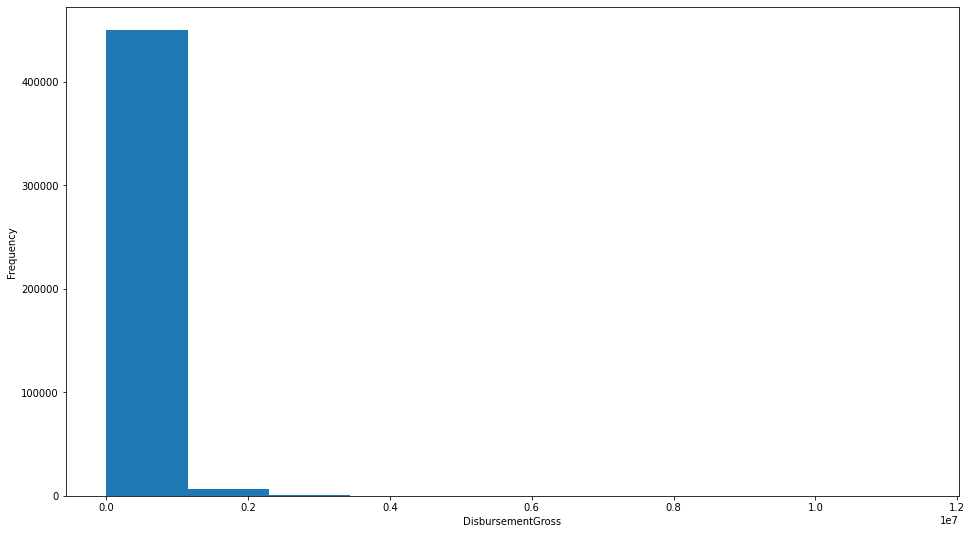

count     456950.00
mean      172163.26
std       275114.19
min         4000.00
25%        35000.00
50%        75766.00
75%       192000.00
max     11446325.00
Name: DisbursementGross, dtype: float64


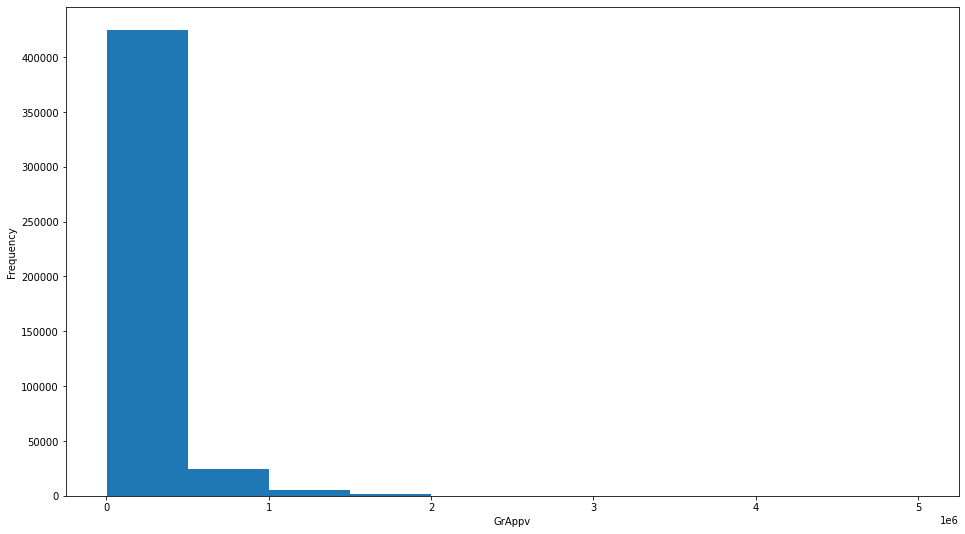

count    456950.00
mean     154212.03
std      261325.30
min        1000.00
25%       25000.00
50%       50000.00
75%      157000.00
max     5000000.00
Name: GrAppv, dtype: float64


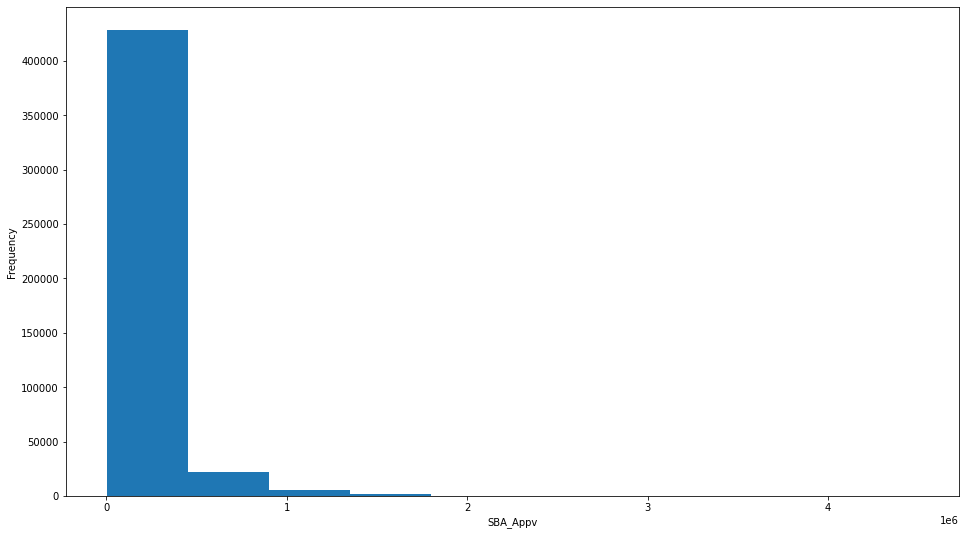

count    456950.00
mean     117206.37
std      214195.26
min         500.00
25%       12750.00
50%       35000.00
75%      125000.00
max     4500000.00
Name: SBA_Appv, dtype: float64


In [51]:
for col in numdf:
    numVisualsHist(col)

In [52]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456950 entries, 0 to 456949
Data columns (total 39 columns):
 #   Column                                                                             Non-Null Count   Dtype         
---  ------                                                                             --------------   -----         
 0   City                                                                               456950 non-null  object        
 1   State                                                                              456950 non-null  object        
 2   Zip                                                                                456950 non-null  int64         
 3   ApprovalDate                                                                       456950 non-null  datetime64[ns]
 4   ApprovalFY                                                                         456950 non-null  object        
 5   Term                                        

In [53]:
df = df.drop(columns = ['CreateJob', 'RetainedJob', 'BalanceGross'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456950 entries, 0 to 456949
Data columns (total 36 columns):
 #   Column                                                                             Non-Null Count   Dtype         
---  ------                                                                             --------------   -----         
 0   City                                                                               456950 non-null  object        
 1   State                                                                              456950 non-null  object        
 2   Zip                                                                                456950 non-null  int64         
 3   ApprovalDate                                                                       456950 non-null  datetime64[ns]
 4   ApprovalFY                                                                         456950 non-null  object        
 5   Term                                        

### Visualizations related to target class attribute, 'MIS_Status'

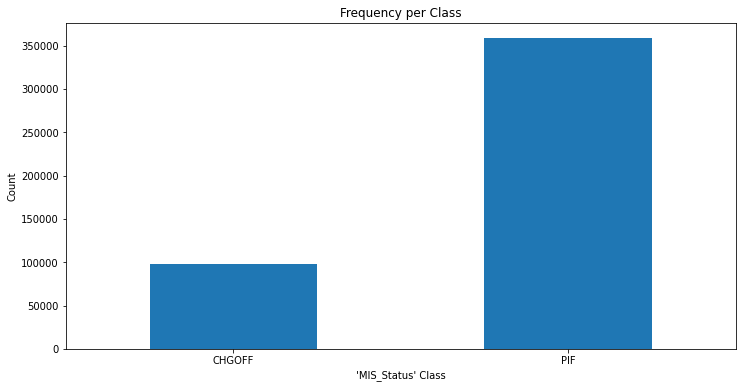

In [54]:
fig = plt.figure(figsize = (12, 6))
df['MIS_Status'].value_counts().sort_index().plot(kind='bar', rot=0, xlabel="'MIS_Status' Class", ylabel='Count', title='Frequency per Class')
plt.show()

Evidence that there is a target class imbalance

In [55]:
# Plot 'MIS_Status' over time using 'ApprovalFY'
tempdf = pd.DataFrame(data=df, columns=['ApprovalFY','MIS_Status'])
tempdf['ApprovalFY'].replace('1976A','1976', inplace = True) 
tempdf1 = tempdf.groupby(['ApprovalFY'])['MIS_Status'].apply(lambda x: (x=='PIF').sum()).reset_index(name='count_PIF')
tempdf2 = tempdf.groupby(['ApprovalFY'])['MIS_Status'].apply(lambda x: (x=='CHGOFF').sum()).reset_index(name='count_CHGOFF')
tempdfmerge = tempdf1.merge(tempdf2, on = ['ApprovalFY'])
tempdfmerge['ApprovalFY'] = tempdfmerge['ApprovalFY'].astype(int) 
tempdfmerge = tempdfmerge.sort_values(by = ['ApprovalFY'], ascending = True ).reset_index(drop = True)
tempdfmerge


,ApprovalFY,count_PIF,count_CHGOFF
0,1984,1,0
1,1987,383,293
2,1988,412,397
3,1989,5414,369
4,1990,6213,274
5,1991,6786,172
6,1992,9270,167
7,1993,10156,186
8,1994,5264,110
9,1994,8252,159


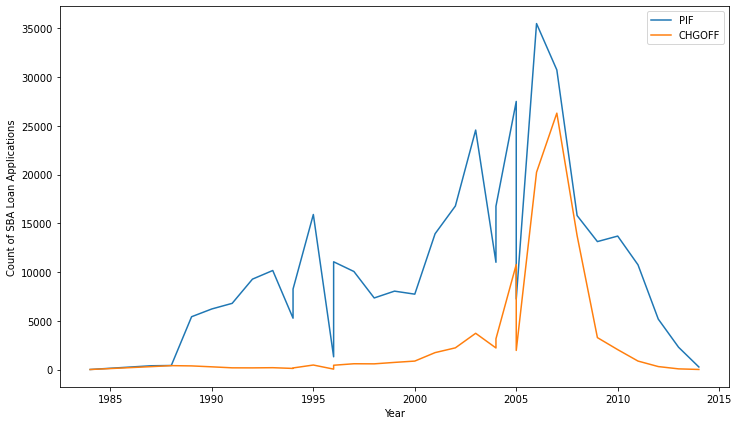

In [56]:
x = tempdfmerge.ApprovalFY
y1 = tempdfmerge.count_PIF
y2 = tempdfmerge.count_CHGOFF

fig = plt.figure(figsize = [12,7])
plt.plot(x,y1, label = 'PIF')
plt.plot(x,y2, label = 'CHGOFF')
plt.xlabel('Year')
plt.ylabel('Count of SBA Loan Applications')
plt.legend()
plt.show()

Between late 1980s and mid-2000s there is a significant increase in variance between the frequency of 'paid-in-full' loans and charge-off loans. One possible way to reduce variance is to limit data to that which is after 2005. 

In [57]:
tempdfnew = tempdf
tempdfnew['ApprovalFY'] = tempdfnew['ApprovalFY'].astype(int)
tempdfnew = tempdfnew[(tempdfnew['ApprovalFY'] >= 2005) & (tempdfnew['ApprovalFY'] <= 2008)].sort_values(by = ['ApprovalFY'], ascending = True).reset_index(drop=True)
tempdfnew 

,ApprovalFY,MIS_Status
0,2005,PIF
1,2005,PIF
2,2005,PIF
3,2005,CHGOFF
4,2005,CHGOFF
...,...,...
189717,2008,CHGOFF
189718,2008,PIF
189719,2008,PIF
189720,2008,PIF


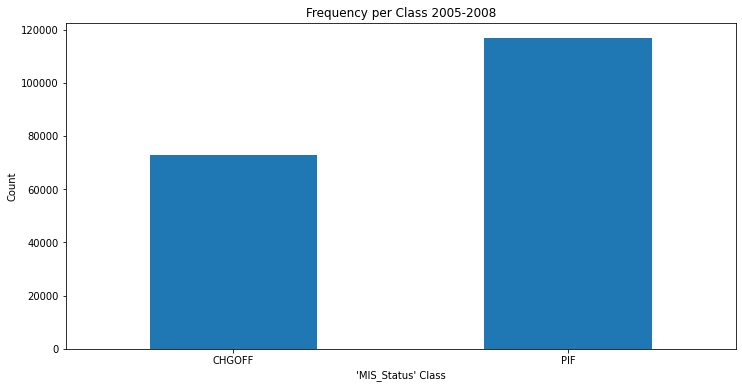

In [58]:
fig = plt.figure(figsize = (12, 6))
tempdfnew['MIS_Status'].value_counts().sort_index().plot(kind='bar', rot=0, xlabel="'MIS_Status' Class", ylabel='Count', title='Frequency per Class 2005-2008')
plt.show()

In [59]:
# Plot 'MIS_Status' over time using 'ApprovalDate'
tempdf = pd.DataFrame(data=df, columns=['ApprovalDate','MIS_Status'])
tempdf1 = tempdf.groupby(['ApprovalDate'])['MIS_Status'].apply(lambda x: (x=='PIF').sum()).reset_index(name='count_PIF')
tempdf2 = tempdf.groupby(['ApprovalDate'])['MIS_Status'].apply(lambda x: (x=='CHGOFF').sum()).reset_index(name='count_CHGOFF')
tempdfmerge = tempdf1.merge(tempdf2, on = ['ApprovalDate'])
tempdfmerge = tempdfmerge.sort_values(by = ['ApprovalDate'], ascending = True ).reset_index(drop = True)
tempdfmerge

,ApprovalDate,count_PIF,count_CHGOFF
0,1984-04-16,1,0
1,1987-01-05,4,0
2,1987-01-06,8,3
3,1987-01-07,4,3
4,1987-01-08,4,1
...,...,...,...
7309,2014-06-12,1,0
7310,2014-06-18,1,0
7311,2014-06-19,1,0
7312,2014-06-23,1,0


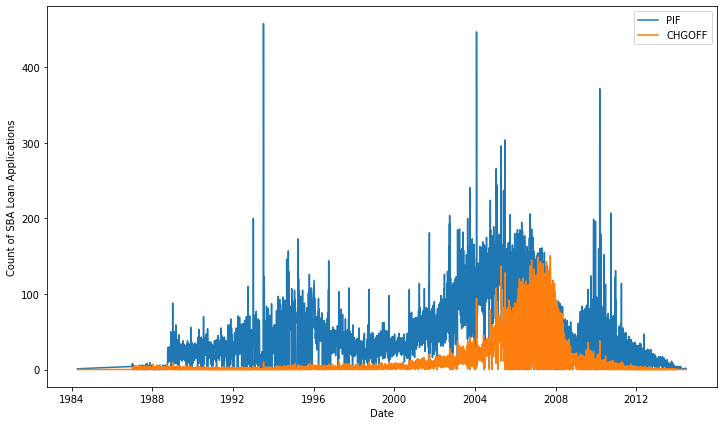

In [60]:
x = tempdfmerge.ApprovalDate
y1 = tempdfmerge.count_PIF
y2 = tempdfmerge.count_CHGOFF

fig = plt.figure(figsize = [12,7])
plt.plot(x,y1, label = 'PIF')
plt.plot(x,y2, label = 'CHGOFF')
plt.xlabel('Date')
plt.ylabel('Count of SBA Loan Applications')
plt.legend()
plt.show()

In [61]:
# Plot 'MIS_Status' over time using 'DisbursementDate'
tempdf = pd.DataFrame(data=df, columns=['DisbursementDate','MIS_Status'])
tempdf1 = tempdf.groupby(['DisbursementDate'])['MIS_Status'].apply(lambda x: (x=='PIF').sum()).reset_index(name='count_PIF')
tempdf2 = tempdf.groupby(['DisbursementDate'])['MIS_Status'].apply(lambda x: (x=='CHGOFF').sum()).reset_index(name='count_CHGOFF')
tempdfmerge = tempdf1.merge(tempdf2, on = ['DisbursementDate'])
tempdfmerge = tempdfmerge.sort_values(by = ['DisbursementDate'], ascending = True ).reset_index(drop = True)
tempdfmerge

,DisbursementDate,count_PIF,count_CHGOFF
0,1984-07-03,1,0
1,1986-12-10,1,0
2,1987-01-23,0,2
3,1987-01-26,0,1
4,1987-01-28,0,2
...,...,...,...
5112,2014-07-05,1,0
5113,2014-07-30,1,0
5114,2014-12-31,1,0
5115,2020-04-14,1,0


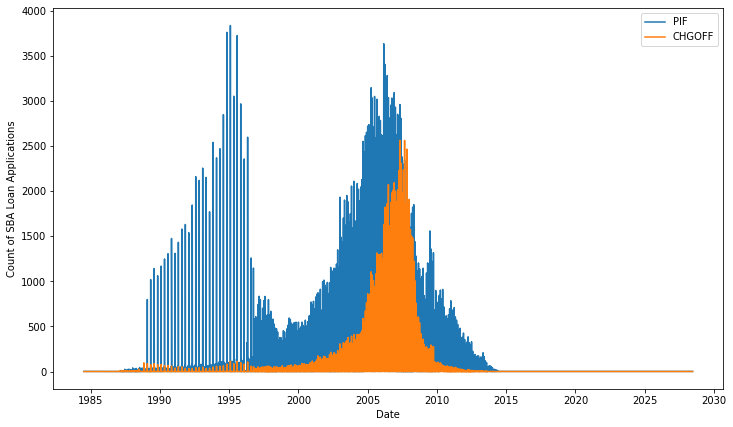

In [62]:
x = tempdfmerge.DisbursementDate
y1 = tempdfmerge.count_PIF
y2 = tempdfmerge.count_CHGOFF

fig = plt.figure(figsize = [12,7])
plt.plot(x,y1, label = 'PIF')
plt.plot(x,y2, label = 'CHGOFF')
plt.xlabel('Date')
plt.ylabel('Count of SBA Loan Applications')
plt.legend()
plt.show()

In [63]:
tempdfnew = tempdf.copy()
#tempdfnew['DisbursementDate'] = tempdfnew['ApprovalFY'].astype(int)
tempdfnew = tempdfnew[(tempdfnew['DisbursementDate'] >= dt.datetime(2005,1,1)) & (tempdfnew['DisbursementDate'] <= dt.datetime(2008,12,31))].sort_values(by = ['DisbursementDate'], ascending = True).reset_index(drop=True)
tempdfnew 

,DisbursementDate,MIS_Status
0,2005-01-12,PIF
1,2005-01-12,PIF
2,2005-01-12,PIF
3,2005-01-12,PIF
4,2005-01-12,PIF
...,...,...
188925,2008-12-31,PIF
188926,2008-12-31,CHGOFF
188927,2008-12-31,PIF
188928,2008-12-31,PIF


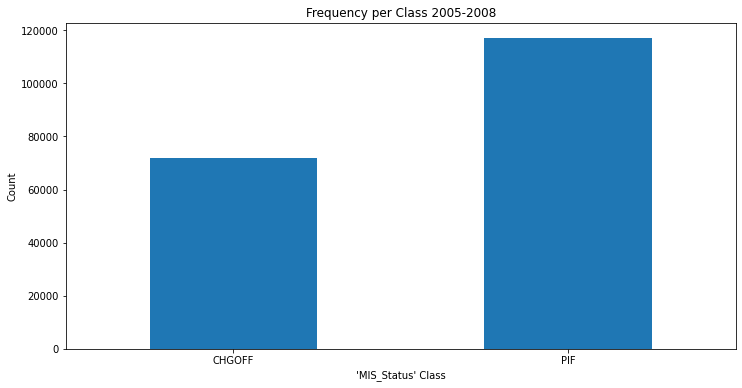

In [64]:
fig = plt.figure(figsize = (12, 6))
tempdfnew['MIS_Status'].value_counts().sort_index().plot(kind='bar', rot=0, xlabel="'MIS_Status' Class", ylabel='Count', title='Frequency per Class 2005-2008')
plt.show()

In [65]:
# Apply filtering date criteria on 'ApprovalYear' to main dataframe.

df['ApprovalFY'] = df['ApprovalFY'].astype(int)
df = df[(df['ApprovalFY'] >= 2005) & (df['ApprovalFY'] <= 2008)].sort_values(by = ['ApprovalFY'], ascending = True).reset_index(drop=True)
df

,City,State,Zip,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,UrbanRural,RevLineCr,...,Industry_Manufacturing,"Industry_Mining, quarrying, and oil and gas extraction",Industry_Other services (except public administration),"Industry_Professional, scientific, and technical services",Industry_Public administration,Industry_Real estate and rental and leasing,Industry_Retail trade,Industry_Transportation and warehousing,Industry_Utilities,Industry_Wholesale trade
0,BROOKLYN,NY,11238,2005-08-23,2005,84,4,1,1,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,PUEBLO,CO,81007,2005-09-29,2005,84,17,1,1,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,MINNEAPOLIS,MN,55447,2005-09-29,2005,84,7,1,1,1,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
3,TAMPA,FL,33617,2005-09-29,2005,34,5,1,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
4,BRENTWOOD,MD,20722,2005-09-29,2005,37,5,1,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189717,College Station,TX,77845,2008-04-28,2008,101,2,2,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
189718,BROOKLYN,NY,11211,2007-11-15,2008,84,3,1,1,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
189719,South Plainfield,NJ,7080,2008-04-28,2008,53,9,2,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
189720,BROOKLYN,NY,11217,2008-04-28,2008,60,1,2,1,1,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [66]:
# No need for ApprovalDate, ApprovalFY, or DisbursementDate, thus drop.
df = df.drop(columns = ['ApprovalDate', 'ApprovalFY','DisbursementDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189722 entries, 0 to 189721
Data columns (total 33 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   City                                                                               189722 non-null  object 
 1   State                                                                              189722 non-null  object 
 2   Zip                                                                                189722 non-null  int64  
 3   Term                                                                               189722 non-null  int64  
 4   NoEmp                                                                              189722 non-null  int64  
 5   NewExist                                                                           189722 non

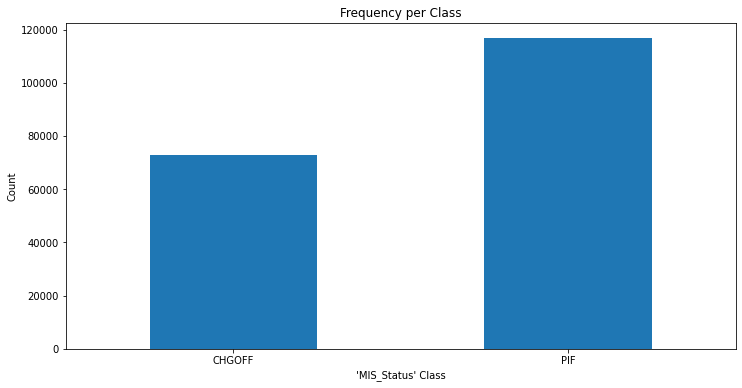

In [67]:
fig = plt.figure(figsize = (12, 6))
df['MIS_Status'].value_counts().sort_index().plot(kind='bar', rot=0, xlabel="'MIS_Status' Class", ylabel='Count', title='Frequency per Class')
plt.show()

Less class imbalance observed.

In [68]:
# Drop rows where 'UrbanRural' == '0' aka 'undefined'
# Drop LowDoc column due to all instances being classified as 'N'

df = df[df['UrbanRural'] != 0].reset_index(drop= True)
df = df.drop(columns= ['LowDoc'])
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189455 entries, 0 to 189454
Data columns (total 32 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   City                                                                               189455 non-null  object 
 1   State                                                                              189455 non-null  object 
 2   Zip                                                                                189455 non-null  int64  
 3   Term                                                                               189455 non-null  int64  
 4   NoEmp                                                                              189455 non-null  int64  
 5   NewExist                                                                           189455 non

In [69]:
# Convert Zip to string
df['Zip'] = df['Zip'].astype(str)
print(df['Zip'].dtype)

object


In [70]:
# Show unique character length counts of Zip
print(df['Zip'].unique())
print("Number of unique Zip codes: ", len(df['Zip'].unique()))

charLen = []
df['Zip'] = df['Zip'].astype(str)
for i in df['Zip']:
    charlength = str(len(i))
    charLen.append(charlength)
print("Set of character lengths: ", set(charLen))

['11238' '81007' '55447' ... '65102' '95992' '57752']
Number of unique Zip codes:  18985
Set of character lengths:  {'4', '3', '1', '5'}


In [71]:
# Filter for Zips of length 4 and 5
df = df[(df['Zip'].str.len() == 4) | (df['Zip'].str.len() == 5)]

print(df['Zip'].unique())
print("Number of unique Zip codes: ", len(df['Zip'].unique()))

charLen = []
df['Zip'] = df['Zip'].astype(str)
for i in df['Zip']:
    charlength = str(len(i))
    charLen.append(charlength)
print("Set of character lengths: ", set(charLen))

['11238' '81007' '55447' ... '65102' '95992' '57752']
Number of unique Zip codes:  18971
Set of character lengths:  {'4', '5'}


In [72]:
# zfill main data frame
df['Zip'] = df['Zip'].str.zfill(5)

charLen = []
df['Zip'] = df['Zip'].astype(str)
for i in df['Zip']:
    charlength = str(len(i))
    charLen.append(charlength)
print("Set of character lenghts: ", set(charLen))

Set of character lenghts:  {'5'}


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189423 entries, 0 to 189454
Data columns (total 32 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   City                                                                               189423 non-null  object 
 1   State                                                                              189423 non-null  object 
 2   Zip                                                                                189423 non-null  object 
 3   Term                                                                               189423 non-null  int64  
 4   NoEmp                                                                              189423 non-null  int64  
 5   NewExist                                                                           189423 non

Need to convert remaining Zips into numerical features (i.e. geospatial coordinates) 

In [74]:
# Zip code conversion into latitude/longitude attributes
nomi = pgeocode.Nominatim('us')
lat = []
lng = []

for i in df['Zip']:
    zp = nomi.query_postal_code(i)
    lat.append(zp['latitude'])
    lng.append(zp['longitude'])
print("latidudes: ", lat[:100])
print("longitudes: ", lng[:100])

latidudes:  [40.679, 38.387, 45.0033, 28.0384, 38.9407, 40.8326, 42.3958, 33.5242, 39.1072, 44.8346, 48.312, 40.7591, 41.7716, 32.6254, 25.9388, 39.9612, 35.1204, 40.8035, 38.0618, nan, 40.7294, 40.398, 43.1685, 31.7814, 42.8356, 42.8356, 42.0155, 39.6146, 37.0089, 31.7718, 26.2823, 38.4305, 43.1396, 39.085, 42.4638, 42.7003, 40.7101, 40.021, 34.0498, 41.82, 40.3011, 43.0128, 43.1685, 41.9205, 40.7651, 43.1095, 33.9769, 47.7918, 39.9408, 32.4316, 37.0831, 40.3011, 37.0831, 40.732, 40.8392, 29.9507, 34.0653, 41.0629, 25.7672, 41.6907, 30.4421, 34.5896, 40.7436, 42.0816, 40.7313, 37.3059, 42.1267, 38.7846, 32.8152, 40.5839, 28.0848, 41.3536, 33.9462, 44.9529, 34.0133, 44.9529, 33.9367, 40.7506, 43.0677, 41.9005, 38.9898, 44.3481, 30.8508, 43.9743, 42.2317, 42.8874, 40.6467, 26.1844, 41.8729, 28.0502, 41.8729, 33.3092, 40.1454, 39.9503, 36.0036, 33.8972, 27.9614, 38.5368, 34.144, 40.8116]
longitudes:  [-73.9644, -104.7792, -93.4875, -82.3949, -76.9531, -74.0015, -83.3772, -84.359, -84.502

In [75]:
df['latitude'] = lat
df['longitude'] = lng
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189423 entries, 0 to 189454
Data columns (total 34 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   City                                                                               189423 non-null  object 
 1   State                                                                              189423 non-null  object 
 2   Zip                                                                                189423 non-null  object 
 3   Term                                                                               189423 non-null  int64  
 4   NoEmp                                                                              189423 non-null  int64  
 5   NewExist                                                                           189423 non

In [76]:
df = df.dropna().reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189019 entries, 0 to 189018
Data columns (total 34 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   City                                                                               189019 non-null  object 
 1   State                                                                              189019 non-null  object 
 2   Zip                                                                                189019 non-null  object 
 3   Term                                                                               189019 non-null  int64  
 4   NoEmp                                                                              189019 non-null  int64  
 5   NewExist                                                                           189019 non

In [77]:
# Now that geographic data has been incorporated in the numerical form of coordinates, remove 'City', 'Zip'
df = df.drop(columns = ['City', 'Zip'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189019 entries, 0 to 189018
Data columns (total 32 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   State                                                                              189019 non-null  object 
 1   Term                                                                               189019 non-null  int64  
 2   NoEmp                                                                              189019 non-null  int64  
 3   NewExist                                                                           189019 non-null  int32  
 4   UrbanRural                                                                         189019 non-null  int64  
 5   RevLineCr                                                                          189019 non

In [78]:
# One-hot encode state variable
df = one_hot_encoder_one(df,'State')
df.head()

,Term,NoEmp,NewExist,UrbanRural,RevLineCr,DisbursementGross,MIS_Status,GrAppv,SBA_Appv,Industry_Accommodation and food services,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,84,4,1,1,1,103579.00,PIF,50000.00,25000.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,84,17,1,1,1,93896.00,PIF,30000.00,15000.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,84,7,1,1,1,136241.00,PIF,80000.00,40000.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,34,5,1,1,0,81771.00,CHGOFF,75000.00,37500.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,37,5,1,1,0,185000.00,CHGOFF,100000.00,50000.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189019 entries, 0 to 189018
Data columns (total 82 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   Term                                                                               189019 non-null  int64  
 1   NoEmp                                                                              189019 non-null  int64  
 2   NewExist                                                                           189019 non-null  int32  
 3   UrbanRural                                                                         189019 non-null  int64  
 4   RevLineCr                                                                          189019 non-null  int64  
 5   DisbursementGross                                                                  189019 non

In [80]:
# Binarize Target variable 'MIS_Status'

misStatusdict = {'CHGOFF':'0', 'PIF':'1'}

df['MIS_Status'] = df['MIS_Status'].map(misStatusdict)
df['MIS_Status'].unique()

array(['1', '0'], dtype=object)

In [81]:
df.head()

,Term,NoEmp,NewExist,UrbanRural,RevLineCr,DisbursementGross,MIS_Status,GrAppv,SBA_Appv,Industry_Accommodation and food services,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,84,4,1,1,1,103579.00,1,50000.00,25000.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,84,17,1,1,1,93896.00,1,30000.00,15000.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,84,7,1,1,1,136241.00,1,80000.00,40000.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,34,5,1,1,0,81771.00,0,75000.00,37500.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,37,5,1,1,0,185000.00,0,100000.00,50000.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [82]:
df['MIS_Status'] = df['MIS_Status'].astype(int)

first_col = df.pop('MIS_Status')
df.insert(0, 'Target_MIS_Status', first_col)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189019 entries, 0 to 189018
Data columns (total 82 columns):
 #   Column                                                                             Non-Null Count   Dtype  
---  ------                                                                             --------------   -----  
 0   Target_MIS_Status                                                                  189019 non-null  int32  
 1   Term                                                                               189019 non-null  int64  
 2   NoEmp                                                                              189019 non-null  int64  
 3   NewExist                                                                           189019 non-null  int32  
 4   UrbanRural                                                                         189019 non-null  int64  
 5   RevLineCr                                                                          189019 non

In [83]:
df.head()

,Target_MIS_Status,Term,NoEmp,NewExist,UrbanRural,RevLineCr,DisbursementGross,GrAppv,SBA_Appv,Industry_Accommodation and food services,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,1,84,4,1,1,1,103579.00,50000.00,25000.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1,84,17,1,1,1,93896.00,30000.00,15000.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,84,7,1,1,1,136241.00,80000.00,40000.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0,34,5,1,1,0,81771.00,75000.00,37500.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0,37,5,1,1,0,185000.00,100000.00,50000.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [90]:
# Convert UrbanRural to 0 and 1 instead of 1 and 0
def subtract1(val):
    val -= 1
    return val

df['UrbanRural'] = df['UrbanRural'].apply(subtract1)
df['NewExist'] = df['NewExist'].apply(subtract1)
print(df['UrbanRural'].unique()) 
print(df['NewExist'].unique())

[0 1]
[0 1]


In [91]:
df.head()

,Target_MIS_Status,Term,NoEmp,NewExist,UrbanRural,RevLineCr,DisbursementGross,GrAppv,SBA_Appv,Industry_Accommodation and food services,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,1,84,4,0,0,1,103579.00,50000.00,25000.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1,84,17,0,0,1,93896.00,30000.00,15000.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,84,7,0,0,1,136241.00,80000.00,40000.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0,34,5,0,0,0,81771.00,75000.00,37500.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0,37,5,0,0,0,185000.00,100000.00,50000.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [86]:
# Export df to csv
#df.to_csv(r'SBAnational_CLEANED_num.csv', index = False)